In [1]:
import os
from array import array
import numpy as np
from commpy.filters import rcosfilter
from commpy.filters import rrcosfilter
import matplotlib
import matplotlib.pyplot as plt
import ipympl
#%matplotlib inline
%matplotlib widget

In [2]:
def calculate_spectrum(signal):
    yf = np.fft.fft(signal)
    yf = np.abs(yf.reshape((len(yf), 1))) / len(signal)
    return yf


def plot_spectrum(signal, figure_counter, title="Amplitude spectrum"):
    spectrum = np.roll(calculate_spectrum(signal), len(signal) // 2)
    yf = 20 * np.log10(spectrum)

    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(-len(spectrum) // 2 + 1, len(spectrum) // 2 + 1)
    x_data = x_data / (len(spectrum) / 2)
    plt.plot(x_data, yf)
    plt.grid(1)
    plt.xlabel('Frequency (semicircles)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)
    plt.show()
    return yf

def add_freq(sig, f0_to_fsig):
    n = np.arange(0, len(sig), 1)
    mixer = np.exp(1j * np.pi * f0_to_fsig * n)
    print(mixer[(821500 - 10 -1) : (821500 - 1)])
    return sig * mixer

In [3]:
def gen_rrc_filter_impulse_response(n, f_sampl, t_symb, roll_off=0.24):
    print(n * f_sampl)
    print(roll_off)
    print(t_symb)    
    print(f_sampl)
    
    s_psf = rrcosfilter(n * f_sampl, roll_off, Ts=t_symb, Fs=f_sampl)[1][1:]
    print(s_psf)
    #plt.figure()
    #plt.plot(s_psf, '*-')
    #plt.grid()
    #plt.title('RC filter impulse response')
    #plt.show()
    return s_psf

1713577
1638400
[ 314. +43.j   94.+137.j  849.+222.j  192.-328.j  178.+240.j  469.-215.j
   35.+166.j -218.+344.j   62.+481.j  236.-240.j]
[  381.-952.j  -210.+180.j -1546.-441.j  -638.-793.j  -500.-412.j
   362.-552.j   466.+460.j  -432.+629.j   754.-337.j   112.+107.j]


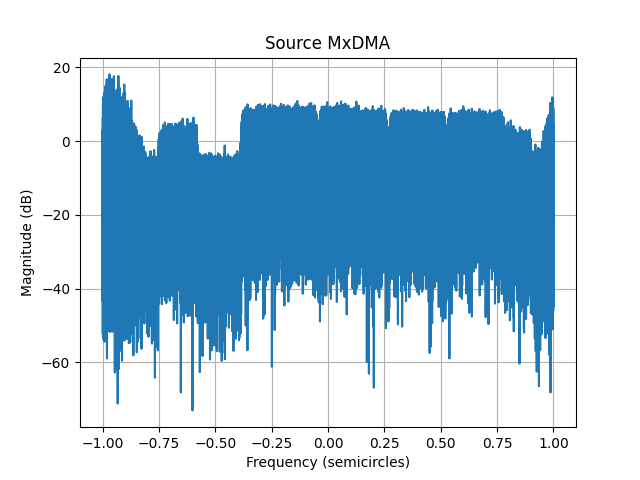

array([[-15.7342997 ],
       [-21.11758474],
       [-12.89300799],
       ...,
       [-14.67277518],
       [-17.0854427 ],
       [-11.25461173]])

In [4]:


def read_signal(file_name, data_type, int_num_to_read = 0):
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    iq_size_in_bytes = 4
    if int_num_to_read == 0:
        int_num_to_read = file_size // iq_size_in_bytes * 2
    int_num_to_read += (int_num_to_read % 2)
    arr = array(data_type)
    with open(file_path, 'rb') as fileobj:
        arr.fromfile(fileobj, int_num_to_read)
    i = np.array(arr[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(arr[1:: 2])
    q = q.reshape((len(q), 1))
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten

file_path = "/home/xy/Signals/MxDMA/HRC/sig_1264460229_16437329_2024-06-14_14-48-43.pcm"
data_type = 'h'
figure_counter = 0
start_pos = 75177 # [IQ-samples]
used_len = 1638400 #16437329 # [IQ-samples]
iq_parts = (start_pos + used_len) * 2
source_signal_full = read_signal(file_path, data_type, iq_parts)
print(len(source_signal_full))
source_signal = source_signal_full[int(start_pos):int(start_pos + used_len)]
print(len(source_signal))
print(source_signal[:10])
print(source_signal[-10:])
plot_spectrum(source_signal, 1, "Source MxDMA")

In [5]:
# RRC filtering
sig_board = 0.168
N = 129#100
Fs = 1
T_symb = 1 / sig_board
s_rrc = gen_rrc_filter_impulse_response(N, Fs, T_symb, 0.05)
print(len(s_rrc))
print(s_rrc)

129
0.05
5.952380952380952
1
[ 1.10054321e-02  1.93091595e-02  2.24701469e-02  1.92910347e-02
  1.03448594e-02 -2.09508636e-03 -1.46203222e-02 -2.36103893e-02
 -2.62670489e-02 -2.14673431e-02 -1.01800697e-02  4.69778601e-03
  1.90690647e-02  2.87503266e-02  3.06726549e-02  2.38292329e-02
  9.68355854e-03 -8.10906164e-03 -2.46256728e-02 -3.50174103e-02
 -3.59085175e-02 -2.64555107e-02 -8.74359178e-03  1.26322667e-02
  3.17307215e-02  4.28849565e-02  4.23467984e-02  2.94869067e-02
  7.18130146e-03 -1.87777367e-02 -4.11422389e-02 -5.31833171e-02
 -5.06545098e-02 -3.31867950e-02 -4.68122536e-03  2.74825623e-02
  5.42840970e-02  6.75057077e-02  6.21410560e-02  3.80907704e-02
  6.15149746e-04 -4.06821160e-02 -7.41776446e-02 -8.93263870e-02
 -7.97469322e-02 -4.54468262e-02  6.49675832e-03  6.31286184e-02
  1.08536893e-01  1.27894482e-01  1.11668275e-01  5.89225984e-02
 -2.12121075e-02 -1.10444764e-01 -1.84592293e-01 -2.18618327e-01
 -1.92378028e-01 -9.57669926e-02  6.79642373e-02  2.81605967e

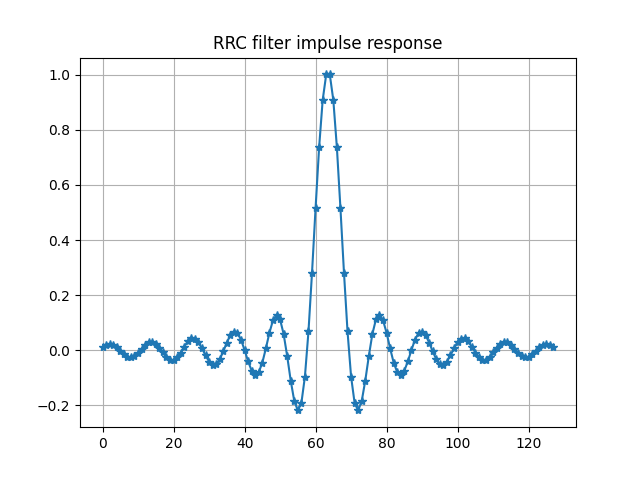

/tmp/ipykernel_13239/3397773970.py:9: RuntimeWarning: divide by zero encountered in log10
  yf = 20 * np.log10(spectrum)


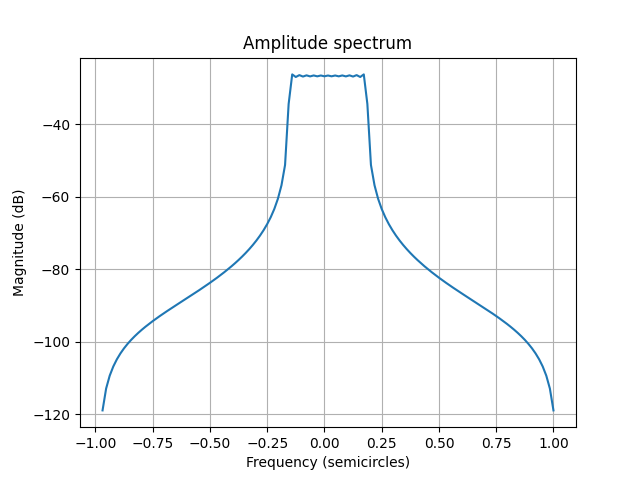

array([[         -inf],
       [-118.96755078],
       [-112.93264732],
       [-109.38695564],
       [-106.85471039],
       [-104.87337773],
       [-103.23688345],
       [-101.83524861],
       [-100.60276989],
       [ -99.49700879],
       [ -98.48892735],
       [ -97.55774989],
       [ -96.68806932],
       [ -95.86811505],
       [ -95.08866382],
       [ -94.34232641],
       [ -93.62306407],
       [ -92.92585088],
       [ -92.24643157],
       [ -91.58114369],
       [ -90.9267841 ],
       [ -90.28050646],
       [ -89.63974079],
       [ -89.00212899],
       [ -88.36547167],
       [ -87.72768317],
       [ -87.08675231],
       [ -86.44070674],
       [ -85.78757952],
       [ -85.12537616],
       [ -84.45204101],
       [ -83.76542134],
       [ -83.06322756],
       [ -82.34298762],
       [ -81.6019931 ],
       [ -80.83723375],
       [ -80.04531611],
       [ -79.22236005],
       [ -78.36386436],
       [ -77.46452854],
       [ -76.51801133],
       [ -75.516

In [6]:
plt.figure(3)
plt.cla()
plt.plot(s_rrc, '*-')
plt.grid()
plt.title('RRC filter impulse response')
plt.show()

plot_spectrum(s_rrc, 4)

[-0.51928048-0.85460387j  0.13156436-0.99130763j  0.72422   -0.68956899j
  0.99656261-0.08284299j  0.82813861+0.56052337j  0.29343972+0.95597758j
 -0.37104371+0.9286154j  -0.87141936+0.49053878j -0.98637763-0.16449673j
 -0.66507396-0.74677749j]
[-341. -241.j -970.-1005.j  150.  +69.j  220. +912.j -546. +250.j
 -590.+1559.j -869. +910.j -414. +110.j  966. +735.j -133. +606.j]
[ 314.         +43.j          -12.7141752 +165.66034453j
  -35.8576813 +876.81196769j  207.69075269+318.29632616j
 -261.81176288-144.00903033j -507.44352247 +93.20446073j
  111.65271303-127.72889913j  336.55102782+229.33252206j
  404.85054154+267.02254402j  188.77881768-278.6728512j
 -259.18820595+386.16897066j  212.9686063 +485.4125799j
  -22.2910583  -74.10876277j  212.5704067 +359.01785776j
  -13.44815852+336.85181762j  147.13205243 +67.58815833j
   35.34331757+507.34588784j   93.90215962 -23.81983248j
  449.54070402+155.44502381j   97.99538724+357.92862987j
  355.64195044+384.08176615j  -65.14069344+278.8936895

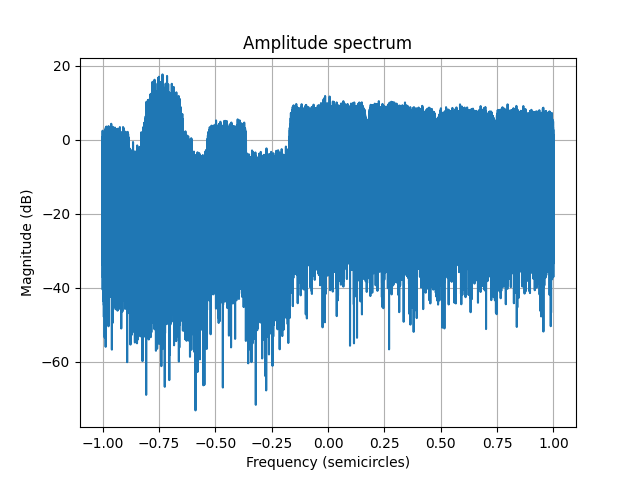

array([[-2.79003464],
       [-4.80332264],
       [-7.79687062],
       ...,
       [-7.78228295],
       [-7.33533877],
       [-2.6613136 ]])

In [7]:
# first subband
left_board = -0.3804
right_board = -0.0512

subcarr_freq = (left_board + right_board) / 2
mixed_sig = add_freq(source_signal, -subcarr_freq)
ss = source_signal[(821500 - 10 -1) : (821500 - 1)]
print(ss)
print(mixed_sig[:30])#821500 - 10 -1) : (821500 - 1)])
plot_spectrum(mixed_sig, 2)

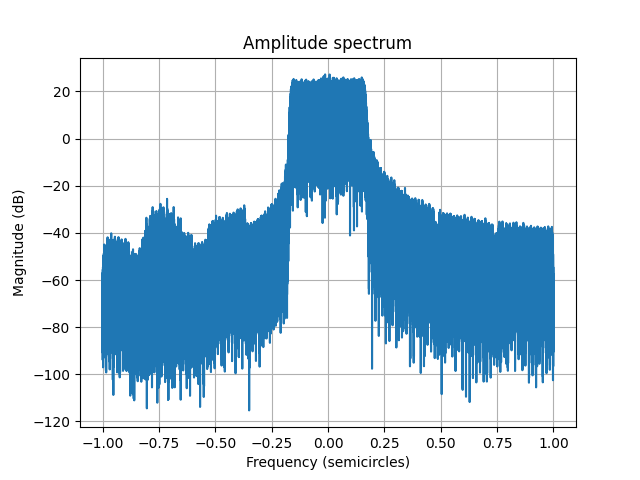

1638400
[ 1359.64659528-1273.88748673j   288.23103374 -957.71070492j
  -740.07937254 -268.66230457j -1518.18543268 +650.15203046j
 -1890.85801089+1621.70773414j -1802.51387191+2470.64875568j
 -1267.70831806+3050.55897092j  -406.30599972+3297.05210241j
   603.48596758+3208.76833166j  1585.84571397+2862.77299354j
  2365.90868206+2389.3415137j   2817.75248281+1907.18012719j
  2884.92785124+1532.11599065j  2588.86136877+1315.76476911j
  2039.57551862+1268.53838393j  1365.61364689+1356.65581119j
   685.65192637+1501.9065861j    120.44981762+1610.5406698j
  -243.05383752+1606.94393367j  -380.39848898+1456.30380706j]
[ 314.         +43.j          -12.7141752 +165.66034453j
  -35.8576813 +876.81196769j  207.69075269+318.29632616j
 -261.81176288-144.00903033j -507.44352247 +93.20446073j
  111.65271303-127.72889913j  336.55102782+229.33252206j
  404.85054154+267.02254402j  188.77881768-278.6728512j ]


In [25]:
sig_rrc_filtered = np.convolve(mixed_sig, s_rrc, 'same')
plot_spectrum(sig_rrc_filtered, 5)
print(len(sig_rrc_filtered))
print(sig_rrc_filtered[1638380:])#(821500 - 10 -1) : (821500 - 1)])
print(mixed_sig[:10])

In [30]:
def read_float_by_unpack_delimeter(file_name, data_num=0):
    # Load test data
    
    #f = open(file_name,'rb')
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    #print(file_size)
    if data_num == 0:
        data_num = int(file_size / 4);


    # Open the binary file using a file object
    with open(file_name, 'rb') as file:
    # Read the binary data and convert it to a NumPy array
        data = np.fromfile(file, dtype=np.float32, sep='\n')

    #with open(file_name, 'rb') as f:
     #   for line in f.readlines():
            # Each line represents a binary float, strip the newline and unpack
      #      number = struct.unpack('f', line.strip())[0]
       #     data_raw[i] = number
    
    #print("data num ")
    #print(data_num)
    #  102500 is the number of numbers contained in the document, and a floating point number occupies 4 bytes
    #arr = f.read(data_num * 4)
    #data_raw = struct.unpack('f'*data_num, arr)
    
    return data

def make_cmplx_sig(iq_data):
    i = np.array(iq_data[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(iq_data[1:: 2])
    q = q.reshape((len(q), 1))
    print(i[:10])
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten

def plot_signal_power(signal, figure_counter, title="Signal Power"):
    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(0, len(signal))
    plt.plot(x_data, signal)
    plt.grid(1)
    plt.xlabel('time (samples)')
    plt.ylabel('Signal Power')
    plt.title(title)
    plt.show()

3277568
[[170.835  ]
 [110.551  ]
 [ 50.1133 ]
 [  5.39303]
 [-10.6171 ]
 [ 11.5888 ]
 [ 70.8705 ]
 [161.95   ]
 [280.863  ]
 [413.311  ]]


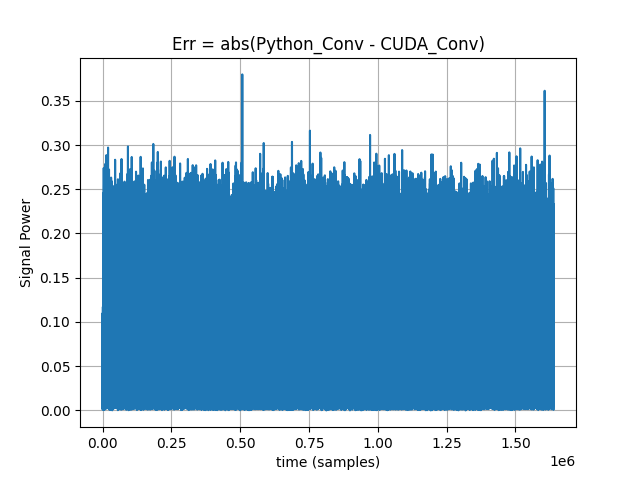

In [35]:
file_rrc_filt = '/home/xy/projects/cuda/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/rrc_filtered.dat'
cuda_filt_sig = read_float_by_unpack_delimeter(file_rrc_filt)

print(len(cuda_filt_sig))
cuda_cmplx_sig = make_cmplx_sig(cuda_filt_sig)

err_conv = cuda_cmplx_sig[:1638400] - sig_rrc_filtered
plot_signal_power(abs(err_conv), 6, "Err = abs(Python_Conv - CUDA_Conv)")

[-0.00310746-7.37257477e-18j  0.00295851-1.30104261e-18j
  0.00795465+8.67361738e-19j  0.0105775 -4.33680869e-19j
  0.00946069-8.67361738e-19j  0.00354535-1.25767452e-17j
 -0.00648539+1.51788304e-18j -0.01866164-1.73472348e-18j
 -0.03076684-3.46944695e-18j -0.0406749 -2.60208521e-18j]
[ 314.          -12.7141752   -35.8576813   207.69075269 -261.81176288
 -507.44352247  111.65271303  336.55102782  404.85054154  188.77881768]


/tmp/ipykernel_10675/3397773970.py:9: RuntimeWarning: divide by zero encountered in log10
  yf = 20 * np.log10(spectrum)


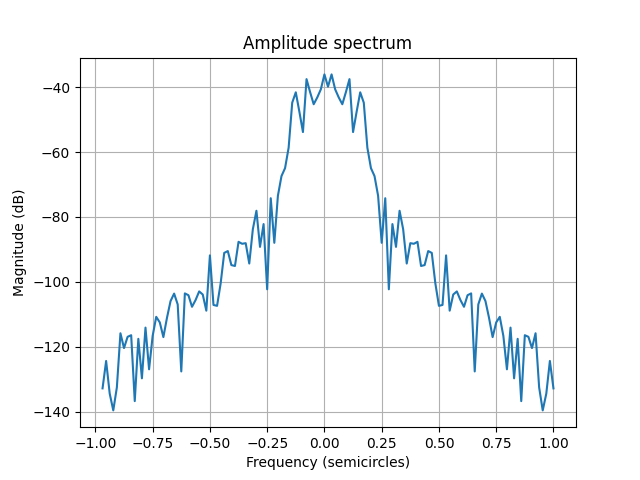

array([[         -inf],
       [-132.83316721],
       [-124.38253213],
       [-134.44850291],
       [-139.62237191],
       [-132.52955669],
       [-115.85204343],
       [-120.41153986],
       [-116.94440308],
       [-116.45080411],
       [-136.76149841],
       [-117.56416952],
       [-129.73266448],
       [-114.10459501],
       [-126.95556351],
       [-116.65410436],
       [-110.78686641],
       [-112.50666005],
       [-117.0341181 ],
       [-111.10246607],
       [-105.93470138],
       [-103.62150571],
       [-106.95961745],
       [-127.61017084],
       [-103.56421821],
       [-104.12223543],
       [-107.68696811],
       [-105.59943414],
       [-102.95266551],
       [-103.90415313],
       [-108.88198046],
       [ -91.84609938],
       [-107.1215802 ],
       [-107.39904834],
       [-100.49659628],
       [ -91.08515009],
       [ -90.50609314],
       [ -94.83143708],
       [ -95.1142001 ],
       [ -87.66828755],
       [ -88.26790245],
       [ -88.081

In [9]:
re_mix = np.real(mixed_sig)
conv_fft = np.fft.ifft((np.fft.fft(re_mix[:len(s_rrc)])) / len(s_rrc)
                                                        * np.fft.fft(s_rrc) / len(s_rrc))
print(conv_fft[:10])
print(re_mix[:10])
plot_spectrum(conv_fft, 7)

In [10]:
a = np.array([2.0432, 213.43221, 894.324, 89214.83, 4378, 138, 1884, 8378, 8743872, 847, 342, 432, 123, 4234], dtype = float)
b = np.array([321.923, 884.134, 9422, 843, 123,12, 43, 12], dtype = float)
print(a)
print(len(a))
print(len(b))
res = np.convolve(a, b, 'same')
print(res)

[2.0432000e+00 2.1343221e+02 8.9432400e+02 8.9214830e+04 4.3780000e+03
 1.3800000e+02 1.8840000e+03 8.3780000e+03 8.7438720e+06 8.4700000e+02
 3.4200000e+02 4.3200000e+02 1.2300000e+02 4.2340000e+03]
14
8
[3.15236887e+07 8.88937388e+07 8.45277484e+08 1.17298782e+08
 2.03470274e+07 2.84177825e+09 7.81546940e+09 8.23941758e+10
 7.38061755e+09 1.08003735e+09 1.11243887e+08 3.81405767e+08
 1.45016562e+08 3.61444500e+06]


In [11]:
def fft_convolution(x, h, K=None):
    Nx = x.shape[0]
    Nh = h.shape[0]
    Ny = Nx + Nh - 1 # output length

    # Make K smallest optimal
    if K is None:
        K = next_power_of_2(Ny)

    # Calculate the fast Fourier transforms 
    # of the time-domain signals
    X = np.fft.fft(pad_zeros_to(x, K))
    H = np.fft.fft(pad_zeros_to(h, K))

    # Perform circular convolution in the frequency domain
    Y = np.multiply(X, H)

    # Go back to time domain
    y = np.real(np.fft.ifft(Y))

    # Trim the signal to the expected length
    return y[:Ny]

def overlap_add_convolution(x, h, B, K=None):
    """Overlap-Add convolution of x and h with block length B"""

    M = len(x)
    N = len(h)

    # Calculate the number of input blocks
    num_input_blocks = np.ceil(M / B).astype(int)

    # Pad x to an integer multiple of B
    xp = pad_zeros_to(x, num_input_blocks*B)

    # Your turn ...
    output_size = num_input_blocks * B + N - 1
    y = np.zeros((output_size,))
    
    # Convolve all blocks
    for n in range(num_input_blocks):
        # Extract the n-th input block
        xb = xp[n*B:(n+1)*B]
        if n == 1:
            print(len(xb))
            print(len(h))

        # Fast convolution
        u = fft_convolution(xb, h, K)

        # Overlap-Add the partial convolution result
        y[n*B:n*B+len(u)] += u

    return y[:M+N-1]


def pad_zeros_to(x, new_length):
    """Append new_length - x.shape[0] zeros to x's end via copy."""
    output = np.zeros((new_length,))
    output[:x.shape[0]] = x
    return output

def next_power_of_2(n):
    return 1 << (int(np.log2(n - 1)) + 1)


128
128
128
128
[[  3.45570569 +3.45570569j]
 [  5.92315109 +5.92315109j]
 [  6.41549682 +6.41549682j]
 [  7.36504031 +7.36504031j]
 [  3.32627119 +3.32627119j]
 [ -7.45427385 -7.45427385j]
 [-15.38098737-15.38098737j]
 [-15.59726109-15.59726109j]
 [ -6.89313693 -6.89313693j]
 [  6.3135761  +6.3135761j ]]
[170.85477393 +940.41908058j 110.51353431+1147.94683384j
  50.08495598+1261.97561722j   5.37954395+1274.75240835j
 -10.62851603+1191.87640643j  11.61860533+1040.01745555j
  70.91473459 +864.10075141j 161.9405981  +708.38908913j
 280.86137644 +614.49414931j 413.30066993 +608.70219195j]


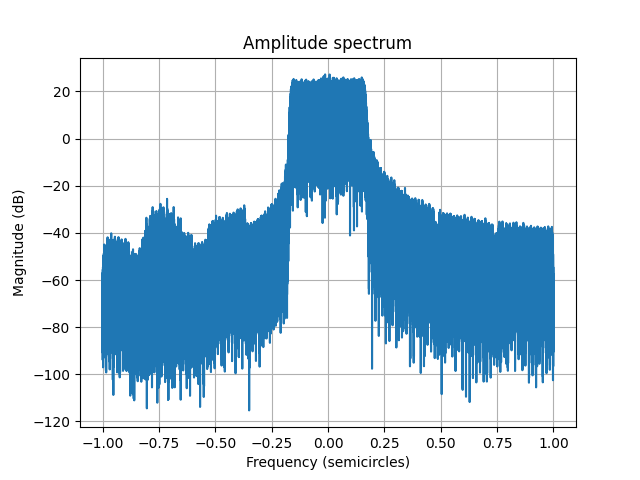

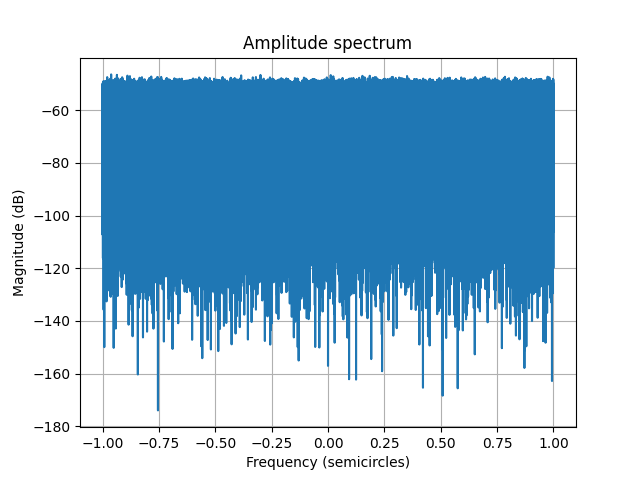

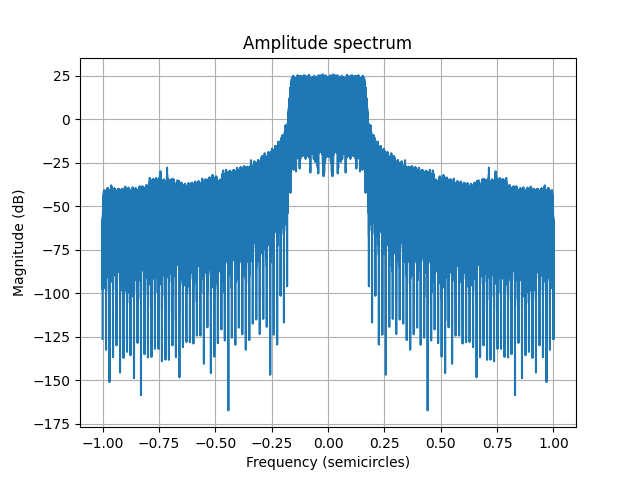

array([[-126.21744974],
       [-123.00777854],
       [-122.16130986],
       ...,
       [-122.16130984],
       [-123.00777854],
       [-126.21744974]])

In [12]:
conv_over_add_re = overlap_add_convolution(mixed_sig.real, s_rrc, 128)
conv_over_add_im = overlap_add_convolution(mixed_sig.imag, s_rrc, 128)
conv_cmplx = np.empty((len(conv_over_add_im), 1), complex)
conv_over_add_re = conv_over_add_re.reshape((len(conv_over_add_re), 1))
conv_cmplx.real = conv_over_add_re
conv_over_add_im = conv_over_add_re.reshape((len(conv_over_add_im), 1))
conv_cmplx.imag = conv_over_add_im
conv_flatten = conv_cmplx.flatten()
print(conv_cmplx[:10])
print(sig_rrc_filtered[:10])
plot_spectrum(sig_rrc_filtered, 7)
plot_spectrum(conv_over_add_im, 8)
plot_spectrum(conv_flatten, 9)

In [13]:
conv_over_add = overlap_add_convolution(a, b, 4)
print(conv_over_add)

4
8
[6.57753074e+02 7.05151999e+04 4.95857169e+05 3.15236887e+07
 8.88937388e+07 8.45277484e+08 1.17298782e+08 2.03470274e+07
 2.84177825e+09 7.81546940e+09 8.23941758e+10 7.38061755e+09
 1.08003735e+09 1.11243887e+08 3.81405767e+08 1.45016562e+08
 3.61444500e+06 5.44938000e+05 6.12810000e+04 1.83538000e+05
 5.08080000e+04]


In [14]:
print(len(res))
print(len(conv_over_add))
aa = conv_over_add[:14] / res
print(aa)

14
21
[2.08653588e-05 7.93252718e-04 5.86620581e-04 2.68746940e-01
 4.36888086e+00 2.97446672e-01 1.50085396e-02 2.46947399e-04
 3.85032585e-01 7.23629551e+00 7.40662500e+02 1.93510906e+01
 7.44768275e+00 3.07775848e+01]


In [15]:
b_rev = b[::-1]
print(b_rev)
conv_test = np.fft.ifft((np.fft.fft(a[:len(b)])) / len(b) * np.fft.fft(b_rev) / len(b))
print(conv_test)

[  12.      43.      12.     123.     843.    9422.     884.134  321.923]
[13211438.34017431+0.j  1888539.60963112+0.j   570780.00564875+0.j
   429014.65278312+0.j  1321486.40605359+0.j   149741.27780359+0.j
   258097.70095639+0.j  1321023.13819734+0.j]


In [16]:
res = np.convolve(a, b, 'same')
print(res)

[3.15236887e+07 8.88937388e+07 8.45277484e+08 1.17298782e+08
 2.03470274e+07 2.84177825e+09 7.81546940e+09 8.23941758e+10
 7.38061755e+09 1.08003735e+09 1.11243887e+08 3.81405767e+08
 1.45016562e+08 3.61444500e+06]


In [17]:
part_len = 821500
sig_part = mixed_sig[:part_len]
sig_part_rrc = np.convolve(sig_part, s_rrc, 'same')
print(sig_part[:10]);
print(s_rrc[:10]);
print(sig_part_rrc[part_len - 10 - 1:part_len])
print(len(sig_part))
print(len(s_rrc))
print(len(sig_part_rrc))

[ 314.         +43.j          -12.7141752 +165.66034453j
  -35.8576813 +876.81196769j  207.69075269+318.29632616j
 -261.81176288-144.00903033j -507.44352247 +93.20446073j
  111.65271303-127.72889913j  336.55102782+229.33252206j
  404.85054154+267.02254402j  188.77881768-278.6728512j ]
[ 0.01100543  0.01930916  0.02247015  0.01929103  0.01034486 -0.00209509
 -0.01462032 -0.02361039 -0.02626705 -0.02146734]
[-1810.10188849+2427.78447908j -2176.38219982+2080.7030281j
 -2427.70043503+1408.08902175j -2571.82533243 +555.6385246j
 -2616.07913444 -335.58878736j -2573.65393629-1113.99878768j
 -2461.54489153-1664.96606574j -2276.9174074 -1933.19981146j
 -2005.34107409-1908.97746571j -1663.81341116-1624.33924053j
 -1273.69619529-1162.76302579j]
821500
128
821500


In [18]:
print(sig_part_rrc[999])

(670.3443645958141-505.03335239676494j)


In [19]:
n = 100
roll_off = 0.05
sig_board = 0.168
Fs = 1
T_symb = 1 / sig_board

rrc = rrcosfilter(n * Fs, roll_off, T_symb, Fs)[1]
print(rrc[:10])
print(len(rrc))

[ 0.03080058  0.0283133   0.01748404  0.00095068 -0.01684876 -0.03084766
 -0.03677109 -0.03241249 -0.01839306  0.00184384]
100


In [20]:
yf = np.fft.fft(rrc)

fft_kernel = (yf.reshape(len(yf), 1)) / len(rrc)
print(fft_kernel)

[[ 5.95354215e-02+0.00000000e+00j]
 [-5.95136906e-02+6.93889390e-19j]
 [ 5.95288923e-02+0.00000000e+00j]
 [-5.95293802e-02+2.77555756e-19j]
 [ 5.94966355e-02-5.55111512e-19j]
 [-5.95980890e-02+1.11022302e-18j]
 [ 5.93283774e-02-1.66533454e-18j]
 [-6.01517260e-02+2.22044605e-18j]
 [ 5.48374241e-02+1.38777878e-19j]
 [-5.84198314e-03+7.80625564e-20j]
 [-1.05891554e-03+1.38777878e-19j]
 [-4.55250375e-04-1.66533454e-18j]
 [-2.60576373e-04-1.11022302e-18j]
 [-1.72581018e-04+0.00000000e+00j]
 [-1.24791304e-04+3.33066907e-18j]
 [-9.56513176e-05-1.11022302e-18j]
 [-7.64131487e-05-2.22044605e-18j]
 [-6.29571696e-05+2.22044605e-18j]
 [-5.31251423e-05-2.22044605e-18j]
 [-4.56918511e-05+4.44089210e-18j]
 [-3.99167313e-05+2.11176968e-18j]
 [-3.53290479e-05+8.98935517e-19j]
 [-3.16169704e-05-6.20633538e-19j]
 [-2.85666917e-05+5.82076919e-19j]
 [-2.60272779e-05-2.28330858e-18j]
 [-2.38894851e-05+2.82561194e-18j]
 [-2.20725181e-05+7.90528768e-19j]
 [-2.05154849e-05+7.50033929e-19j]
 [-1.91717286e-05+3.

In [21]:
conv = np.convolve(sig_part[:100], rrc, 'same')
print(conv)

[  188.08643965 +824.11073599j   148.37278691+1051.44344363j
   106.91083918+1212.46722923j    46.5579546 +1288.91228445j
     6.13907792+1248.59060639j   -11.45751115+1117.61973608j
     4.9377041  +935.94144485j    73.13173045 +752.54428861j
   211.59302788 +610.47556779j   358.60462919 +554.38265647j
   507.51995624 +615.16185088j   622.59965496 +789.38012174j
   728.02003665+1024.04455587j   790.23212699+1286.17833096j
   805.42844502+1516.26404655j   791.29692423+1685.67202426j
   772.21905683+1757.08635063j   739.13380248+1728.56732035j
   693.56242282+1589.48761868j   639.81736171+1370.6014478j
   564.10349905+1124.29173543j   468.33343238 +879.95989709j
   368.53902374 +680.18002602j   246.61457368 +543.76495344j
   106.51055419 +477.64689196j   -54.4279314  +485.66311598j
  -211.63015094 +546.32337242j  -362.69786663 +581.33513334j
  -482.4134358  +542.84317541j  -545.90648133 +405.44981576j
  -535.52994878 +166.7435977j   -424.76571342 -169.30167356j
  -215.90869437 -552.7746

In [22]:
ss = sig_part[:100]
yf = np.fft.fft(ss)

fft_sig = (yf.reshape(len(yf), 1)) / len(ss)
print(fft_sig)

[[ -1.14056031 +29.29159497j]
 [ 10.29665673 +42.16074038j]
 [ 21.86630794 -38.54749366j]
 [ 41.92673684 -19.80731191j]
 [-63.93566981 +14.98167479j]
 [ 37.88733935  +8.90612089j]
 [ 37.31541378  -5.36122177j]
 [  6.02775337 +74.68030153j]
 [ 11.01365645 +37.1914794j ]
 [-30.05470385 +19.92032334j]
 [-33.25438619 +27.72818568j]
 [ 58.23664474 -41.45429528j]
 [ 91.66113147 +32.748531j  ]
 [-32.34032556 +24.62283477j]
 [-36.31099418 -34.83251685j]
 [ 34.21526964 +49.0971489j ]
 [ 20.50822723 -86.86358919j]
 [-20.44347381  -3.53898861j]
 [ -3.08713788 -66.5422988j ]
 [  2.40609834  +1.6326454j ]
 [ 19.45605931 -13.2872213j ]
 [  0.72141855  -0.6707939j ]
 [-12.55138274  +7.46102346j]
 [ 15.91269293  +4.87996572j]
 [-32.42663808  -9.31791408j]
 [-36.92166319  +9.66964891j]
 [ 11.36595149 -27.44295495j]
 [ -3.61178109 +13.49720177j]
 [ 21.79139798 -32.13666799j]
 [-15.69612791 +28.25547943j]
 [ -7.14581879 -20.78459513j]
 [ 43.79130623 -14.97072406j]
 [ 13.3642544   -9.08181306j]
 [  1.1634

In [23]:
mult = fft_sig * fft_kernel
print(mult)

[[-6.79037385e-02+1.74388745e+00j]
 [-6.12792043e-01-2.50914126e+00j]
 [ 1.30167709e+00-2.29468960e+00j]
 [-2.49587266e+00+1.17911700e+00j]
 [-3.80395724e+00+8.91359244e-01j]
 [-2.25801302e+00-5.30787786e-01j]
 [ 2.21386295e+00-3.18072588e-01j]
 [-3.62579769e-01-4.49214903e+00j]
 [ 6.03960549e-01+2.03948493e+00j]
 [ 1.75579073e-01-1.16374193e-01j]
 [ 3.52135862e-02-2.93618067e-02j]
 [-2.65122544e-02+1.88720835e-02j]
 [-2.38847252e-02-8.53349344e-03j]
 [ 5.58132631e-03-4.24943389e-03j]
 [ 4.53129633e-03+4.34679521e-03j]
 [-3.27273562e-03-4.69620698e-03j]
 [-1.56709822e-03+6.63752036e-03j]
 [ 1.28706325e-03+2.22804706e-04j]
 [ 1.64004639e-04+3.53506909e-03j]
 [-1.09939087e-04-7.45985904e-05j]
 [-7.76622291e-04+5.30382442e-04j]
 [-2.54870307e-05+2.36985100e-05j]
 [ 3.96836697e-04-2.35894958e-04j]
 [-4.54572993e-04-1.39404476e-04j]
 [ 8.43977120e-04+2.42519939e-04j]
 [ 8.82039524e-04-2.31002934e-04j]
 [-2.50875170e-04+6.05735120e-04j]
 [ 7.40974404e-05-2.76901639e-04j]
 [-4.17778767e-04+6.

In [24]:
yf = np.fft.irfft((mult), 64)


#conv_res = yf.reshape(len(yf), 1) / len(mult)
print(yf)

[[-0.001061   -0.001061   -0.001061   ... -0.001061   -0.001061
  -0.001061  ]
 [-0.00957488 -0.00957488 -0.00957488 ... -0.00957488 -0.00957488
  -0.00957488]
 [ 0.0203387   0.0203387   0.0203387  ...  0.0203387   0.0203387
   0.0203387 ]
 ...
 [ 0.02725519  0.02725519  0.02725519 ...  0.02725519  0.02725519
   0.02725519]
 [-0.03150177 -0.03150177 -0.03150177 ... -0.03150177 -0.03150177
  -0.03150177]
 [ 0.0050151   0.0050151   0.0050151  ...  0.0050151   0.0050151
   0.0050151 ]]
